<a href="https://colab.research.google.com/github/hudaquresh/DL_Course/blob/main/BuildingComputationGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline
import torch
from torch.nn.parameter import Parameter

Populating the interactive namespace from numpy and matplotlib


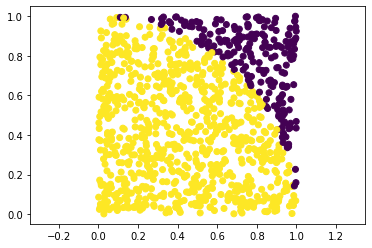

In [ ]:
x = torch.rand([1000,2])
x_in_circle = ((x**2).sum(1) < 1)

def accuracy(pred_label): 
  return (pred_label==x_in_circle).float().mean()

def show(pred_label): 
  scatter(*x.numpy().T, c=pred_label.numpy())
  axis('equal')

def loss(prediction): 
  return -(x_in_circle.float()       * prediction.log() + 
           (1-x_in_circle.float())   * (1-prediction).log() ).mean()

show(x_in_circle)

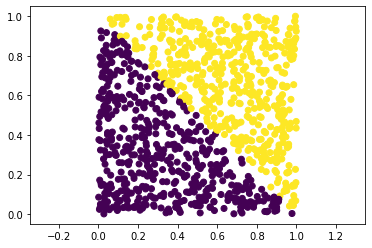

In [ ]:
class Linear(torch.nn.Module): 
  def __init__(self, input_dim): 
    super().__init__()
    self.w = Parameter(torch.ones(input_dim))
    self.b = Parameter(-torch.ones(1))

  def forward(self, x): 
    return (x * self.w[None, :]).sum(dim=1) + self.b

class LinearClassifier(torch.nn.Module): 
  def __init__(self, input_dim): 
    super().__init__()
    self.linear = Linear(input_dim)

  def forward(self, x): 
    logit = self.linear(x)
    return 1/(1 + (-logit).exp())

classifier = LinearClassifier(2)

show(classifier(x).detach() > 0.5)

In [ ]:
list(classifier.parameters())

[Parameter containing:
 tensor([1., 1.], requires_grad=True), Parameter containing:
 tensor([-1.], requires_grad=True)]